# Support vector Machine Classification of IRIS flowers

In [3]:
# import necessary libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 2.load datasets
df = pd.read_csv('Week8_Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# 3.shapes
df.shape
print(df.shape[0],"  - ",df.shape[1])

150   -  6


In [6]:
# 4.print dataframe into dataTypes
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# 5.attribute name...
# print(df.columns.values)
print(df.columns.tolist())

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [8]:
# 6.top 5 rows and 7.bottom 5 rows
print("top 5 rows:\n ",df.head(),"\n tail 5 rows:\n ",df.tail())

top 5 rows:
     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 
 tail 5 rows:
        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica 

In [9]:
# 8.print the unique class labels..
df['Species'].value_counts().index

# df.groupby(by='Species').size().index

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='Species')

In [10]:
# 9.print no of examples from each class label, and print no .of missing valuse in each column..
print(f"no.of examp from each classs label: {df['Species'].value_counts()}")
print(f"no .of missing valuse in each column -> {df.isna().sum()}")



no.of examp from each classs label: Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
no .of missing valuse in each column -> Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
# 10.first print ID column, next drop it
# print(df['Id'])

# 10.drop Id column
df=df.drop(columns='Id')
df
# df.drop(columns=['Id','SepalLengthCm'])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
# 11.print summary statics ...
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


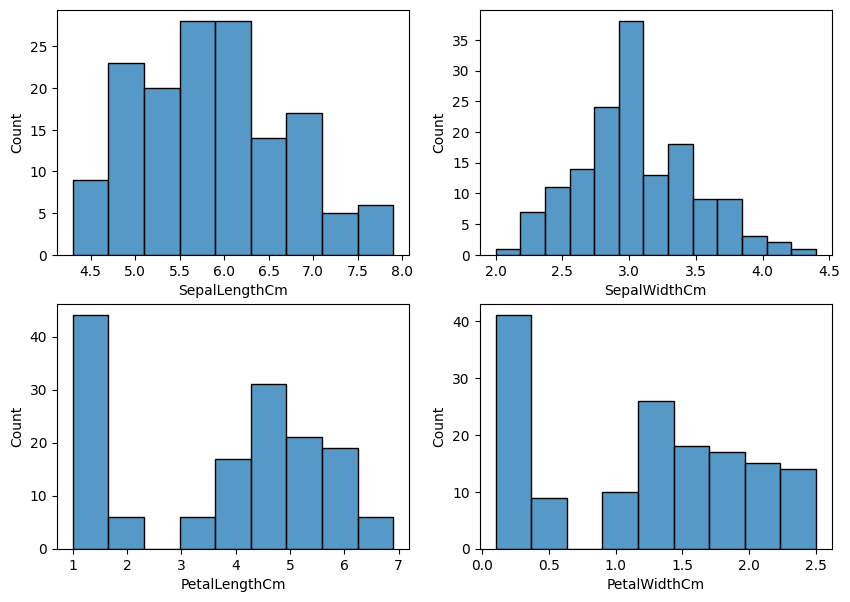

In [13]:
# 12.plot histogram of all input features..
cols = df.columns.tolist()
cols.remove('Species') # id already deleted..
print(cols)

import  matplotlib.pyplot as plt
import seaborn as sns

fig,axis = plt.subplots(2,2,figsize=(10,7))
axis = axis.flatten() #makes it easier to access subplots with a simple axis[i].

for i,col in enumerate(cols):
  sns.histplot(data=df,x=col,ax=axis[i])
  
# plt.tight_layout()
# plt.show()
  

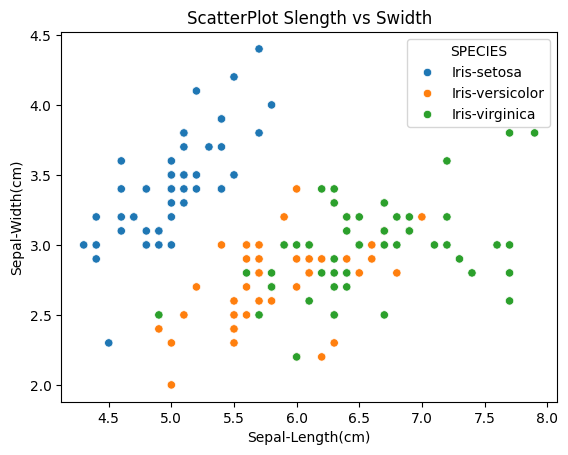

In [14]:
# 13.create a scatterPlot from sepalLengthCm vs SepalWidthCm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# one way using sns and hue...
df = pd.read_csv("Week8_Iris.csv")
sns.scatterplot(data=df, x='SepalLengthCm',y='SepalWidthCm',hue='Species')

# no need but looks clean Code and description..
plt.title("ScatterPlot Slength vs Swidth")
plt.xlabel("Sepal-Length(cm)")
plt.ylabel("Sepal-Width(cm)")
plt.legend(title="SPECIES")



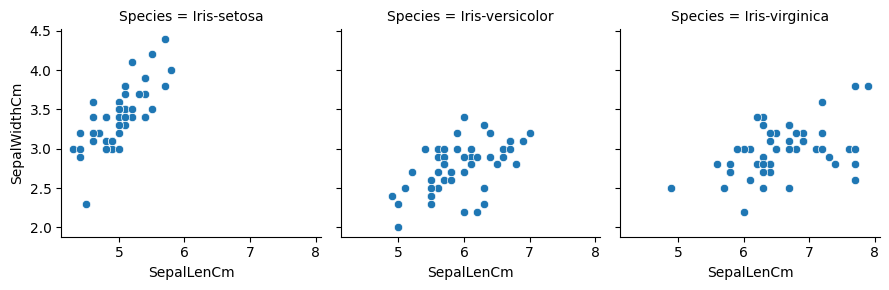

In [15]:
# 14.create a scatterPlot from sepalLengthCm vs SepalWidthCm using facecrid
# sns.FacetGrid(data=df,x="SepalLengthCm",y="SepalWidthCm")

# i.creat a faceGrid using cols or hue=
grid =sns.FacetGrid(df,col='Species') # separting plot with species
grid.map_dataframe(sns.scatterplot,x="SepalLengthCm",y='SepalWidthCm')

grid.set_axis_labels("SepalLenCm","SepalWidthCm")
# grid.set_titles(f"title:{Species}")
plt.show()


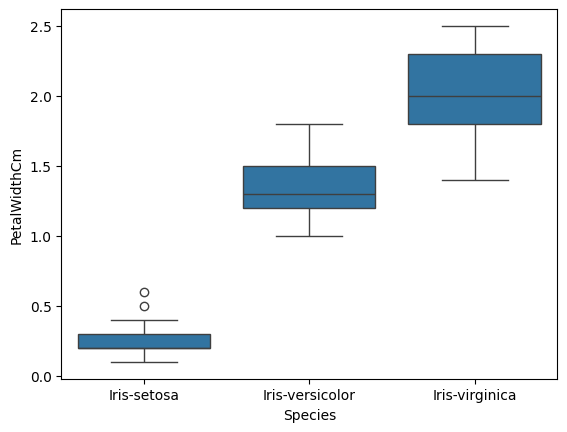

In [16]:
# 15.boxpetal of petalWidth for differentSpecies...
sns.boxplot(data=df,y='PetalWidthCm', x='Species')
# plt.title("BoxPlot")
# plt.xlabel("Speices")
# plt.ylabel("PWidth")

plt.show()

Text(0, 0.5, 'y-axiz Plength')

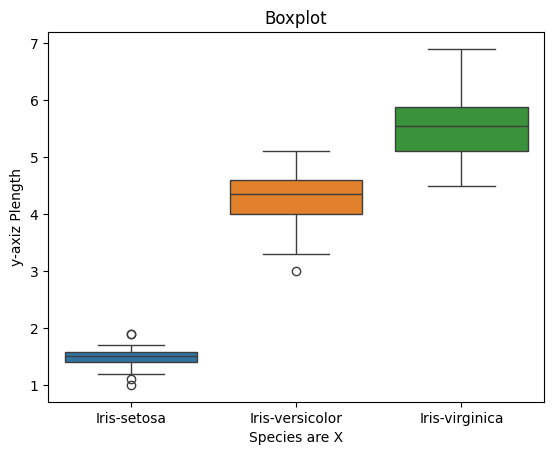

In [17]:
# 16. boxplot of PetalLength for different spiececs...
sns.boxplot(data=df,y='PetalLengthCm',x='Species',hue='Species')
plt.title("Boxplot")
plt.xlabel("Species are X")
plt.ylabel("y-axiz Plength")

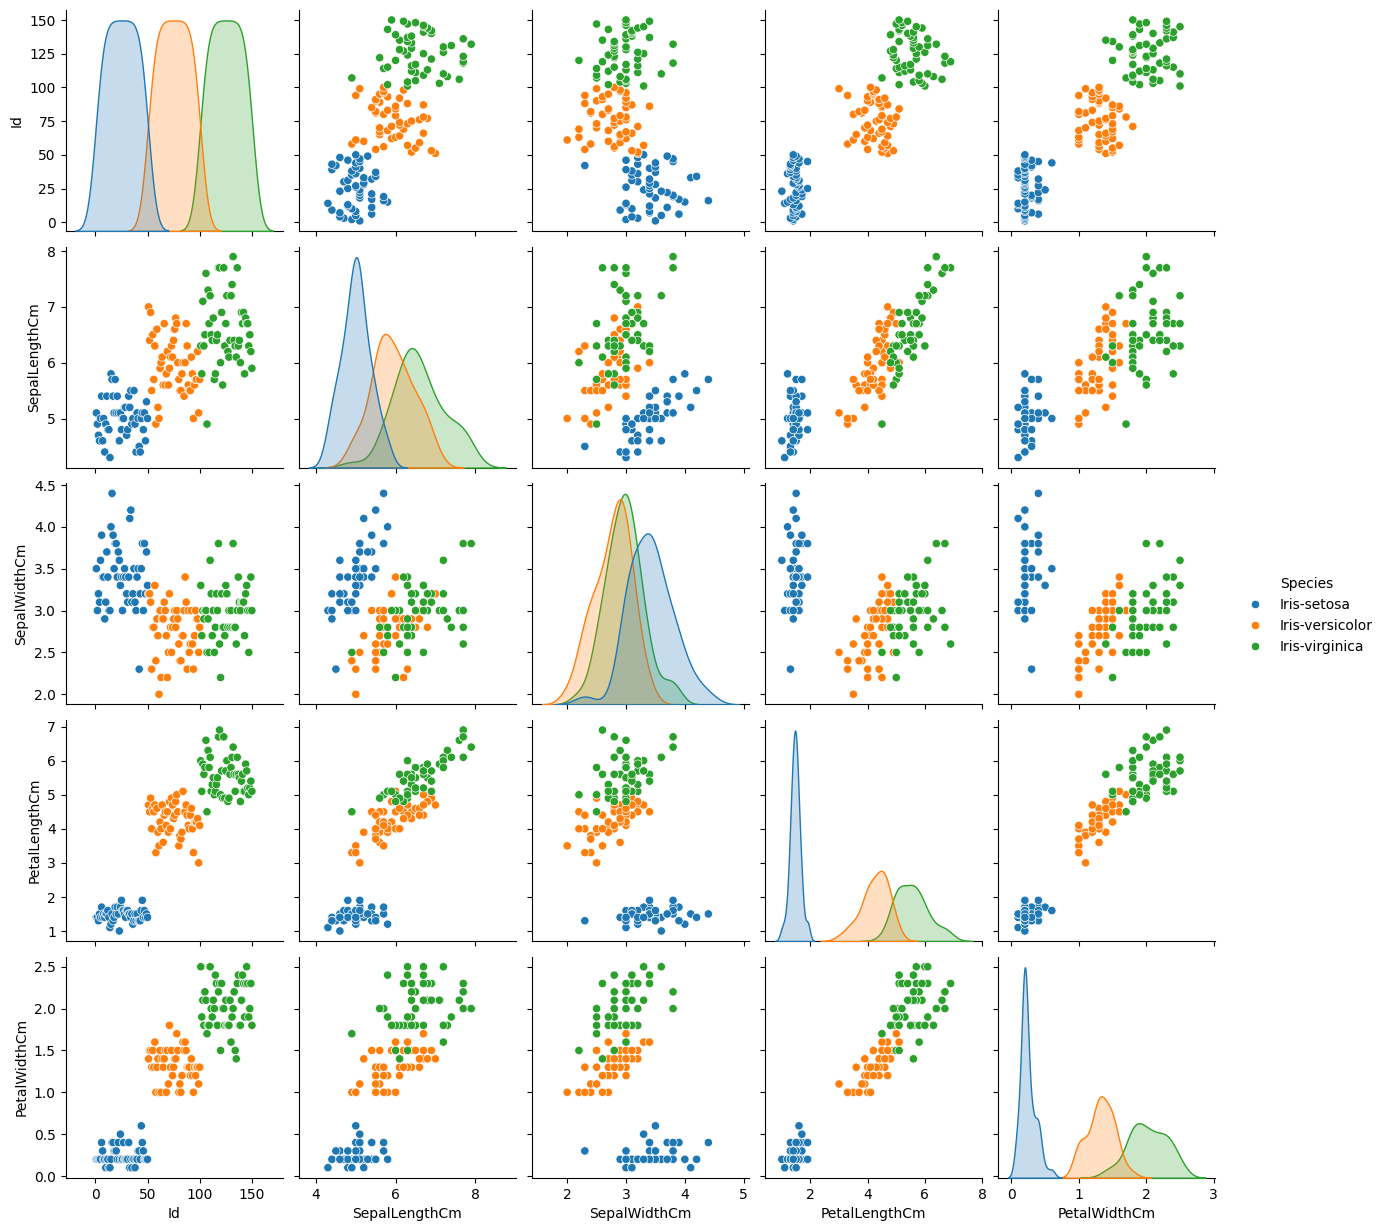

In [18]:

# 17.pairplot of all input features closed by speices (use hue parameter)

sns.pairplot(data=df,hue='Species')
plt.show()


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


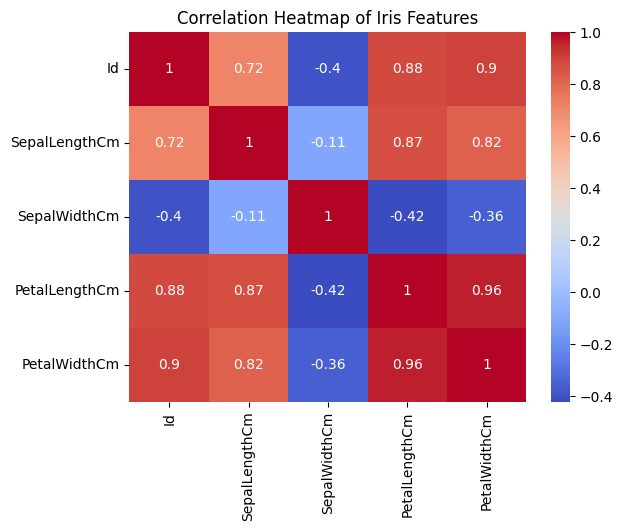

In [19]:
# 18.print the correlation among different features...

# 1 way
corrDF = df.drop(columns="Species")

# other 2 way..by includeing only numbers..
corrDF2 = df.select_dtypes(include="number")
print(corrDF2.corr())

# visualization...
sns.heatmap(corrDF2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Features")
plt.show()

In [20]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
# 19.preparing x,y as loading dataset...

# x -> taking all features as input(its a model takes input)
x =df.drop(columns='Species')
# y -> target..
y=df['Species']

x.shape,y.shape

((150, 5), (150,))

In [22]:
# 20.split into 70% train and 30% test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((105, 5), (45, 5), (105,), (45,))

In [23]:
# 21.look at the documentation of the SVC  class that you will use to create the model...

from sklearn.svm import SVC
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [24]:
# 22 Start building your model
model = SVC(kernel='rbf',gamma='scale',probability=True,C=0.1)
model.fit(x_train,y_train)

SVC(C=0.1, probability=True)

In [28]:
# 23. 🧪 Create an SVC object with cost C = 1
# → Make an object (instance) of the SVC class by setting the cost parameter (C) to 1.

from sklearn.metrics import accuracy_score

y_pred = model.predict(x_train)
accuracy_score(y_train,y_pred)

0.9904761904761905